In [1]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv("iris.csv")

df.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [12]:
df.shape

(150, 6)

In [3]:
x = df.iloc[:, 1:5]
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y = df.iloc[:, 5]
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object

In [6]:
x_mean = x - np.mean(x, axis=0)
x_mean.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333


In [15]:
covariance = np.cov(x_mean, rowvar=False)
print(covariance)

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


In [17]:
eigen_values, eigen_vectors = np.linalg.eigh(covariance)
print(eigen_values)
print(eigen_vectors)

[0.02383509 0.0782095  0.24267075 4.22824171]
[[ 0.31548719  0.58202985  0.65658877 -0.36138659]
 [-0.3197231  -0.59791083  0.73016143  0.08452251]
 [-0.47983899 -0.07623608 -0.17337266 -0.85667061]
 [ 0.75365743 -0.54583143 -0.07548102 -0.3582892 ]]


In [18]:
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigen_values = eigen_values[sorted_index]
sorted_eigen_vectors = eigen_vectors[:, sorted_index]

print(sorted_eigen_values)
print(sorted_eigen_vectors)

[4.22824171 0.24267075 0.0782095  0.02383509]
[[-0.36138659  0.65658877  0.58202985  0.31548719]
 [ 0.08452251  0.73016143 -0.59791083 -0.3197231 ]
 [-0.85667061 -0.17337266 -0.07623608 -0.47983899]
 [-0.3582892  -0.07548102 -0.54583143  0.75365743]]


In [19]:
n_components = 2

In [20]:
eigen_subset = sorted_eigen_vectors[:, 0 : n_components]
print(eigen_subset)

[[-0.36138659  0.65658877]
 [ 0.08452251  0.73016143]
 [-0.85667061 -0.17337266]
 [-0.3582892  -0.07548102]]


In [21]:
x_reduced = np.dot(eigen_subset.transpose(), x_mean.transpose()).transpose()
print(x_reduced)

[[ 2.68412563  0.31939725]
 [ 2.71414169 -0.17700123]
 [ 2.88899057 -0.14494943]
 [ 2.74534286 -0.31829898]
 [ 2.72871654  0.32675451]
 [ 2.28085963  0.74133045]
 [ 2.82053775 -0.08946138]
 [ 2.62614497  0.16338496]
 [ 2.88638273 -0.57831175]
 [ 2.6727558  -0.11377425]
 [ 2.50694709  0.6450689 ]
 [ 2.61275523  0.01472994]
 [ 2.78610927 -0.235112  ]
 [ 3.22380374 -0.51139459]
 [ 2.64475039  1.17876464]
 [ 2.38603903  1.33806233]
 [ 2.62352788  0.81067951]
 [ 2.64829671  0.31184914]
 [ 2.19982032  0.87283904]
 [ 2.5879864   0.51356031]
 [ 2.31025622  0.39134594]
 [ 2.54370523  0.43299606]
 [ 3.21593942  0.13346807]
 [ 2.30273318  0.09870885]
 [ 2.35575405 -0.03728186]
 [ 2.50666891 -0.14601688]
 [ 2.46882007  0.13095149]
 [ 2.56231991  0.36771886]
 [ 2.63953472  0.31203998]
 [ 2.63198939 -0.19696122]
 [ 2.58739848 -0.20431849]
 [ 2.4099325   0.41092426]
 [ 2.64886233  0.81336382]
 [ 2.59873675  1.09314576]
 [ 2.63692688 -0.12132235]
 [ 2.86624165  0.06936447]
 [ 2.62523805  0.59937002]
 

In [25]:
principal_df = pd.DataFrame(x_reduced, columns = ['PC1', 'PC2'])
principal_df = pd.concat([principal_df, pd.DataFrame(y)], axis = 1)

principal_df

,PC1,PC2,Species
0,2.684126,0.319397,setosa
1,2.714142,-0.177001,setosa
2,2.888991,-0.144949,setosa
3,2.745343,-0.318299,setosa
4,2.728717,0.326755,setosa
...,...,...,...
145,-1.944110,0.187532,virginica
146,-1.527167,-0.375317,virginica
147,-1.764346,0.078859,virginica
148,-1.900942,0.116628,virginica


In [27]:
import seaborn as sb
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

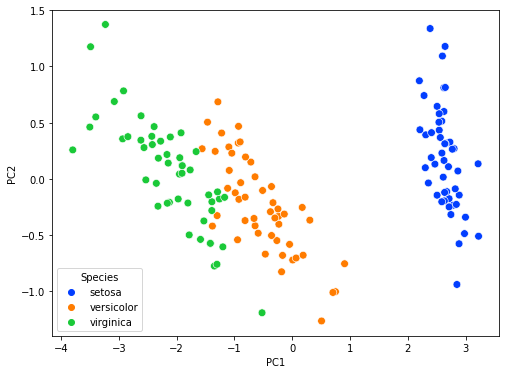

In [40]:
plt.figure(figsize = (8, 6))
sb.scatterplot(data=principal_df, x='PC1', y='PC2', s=60, hue='Species', palette='bright')